In [30]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [50]:
%matplotlib inline
import sys
sys.path.append('../')

import skimage
import numpy as np
import util
import eval
from collections import OrderedDict
from matplotlib import pyplot as plt
import sklearn
import scipy

eval._DEBUG_ = True

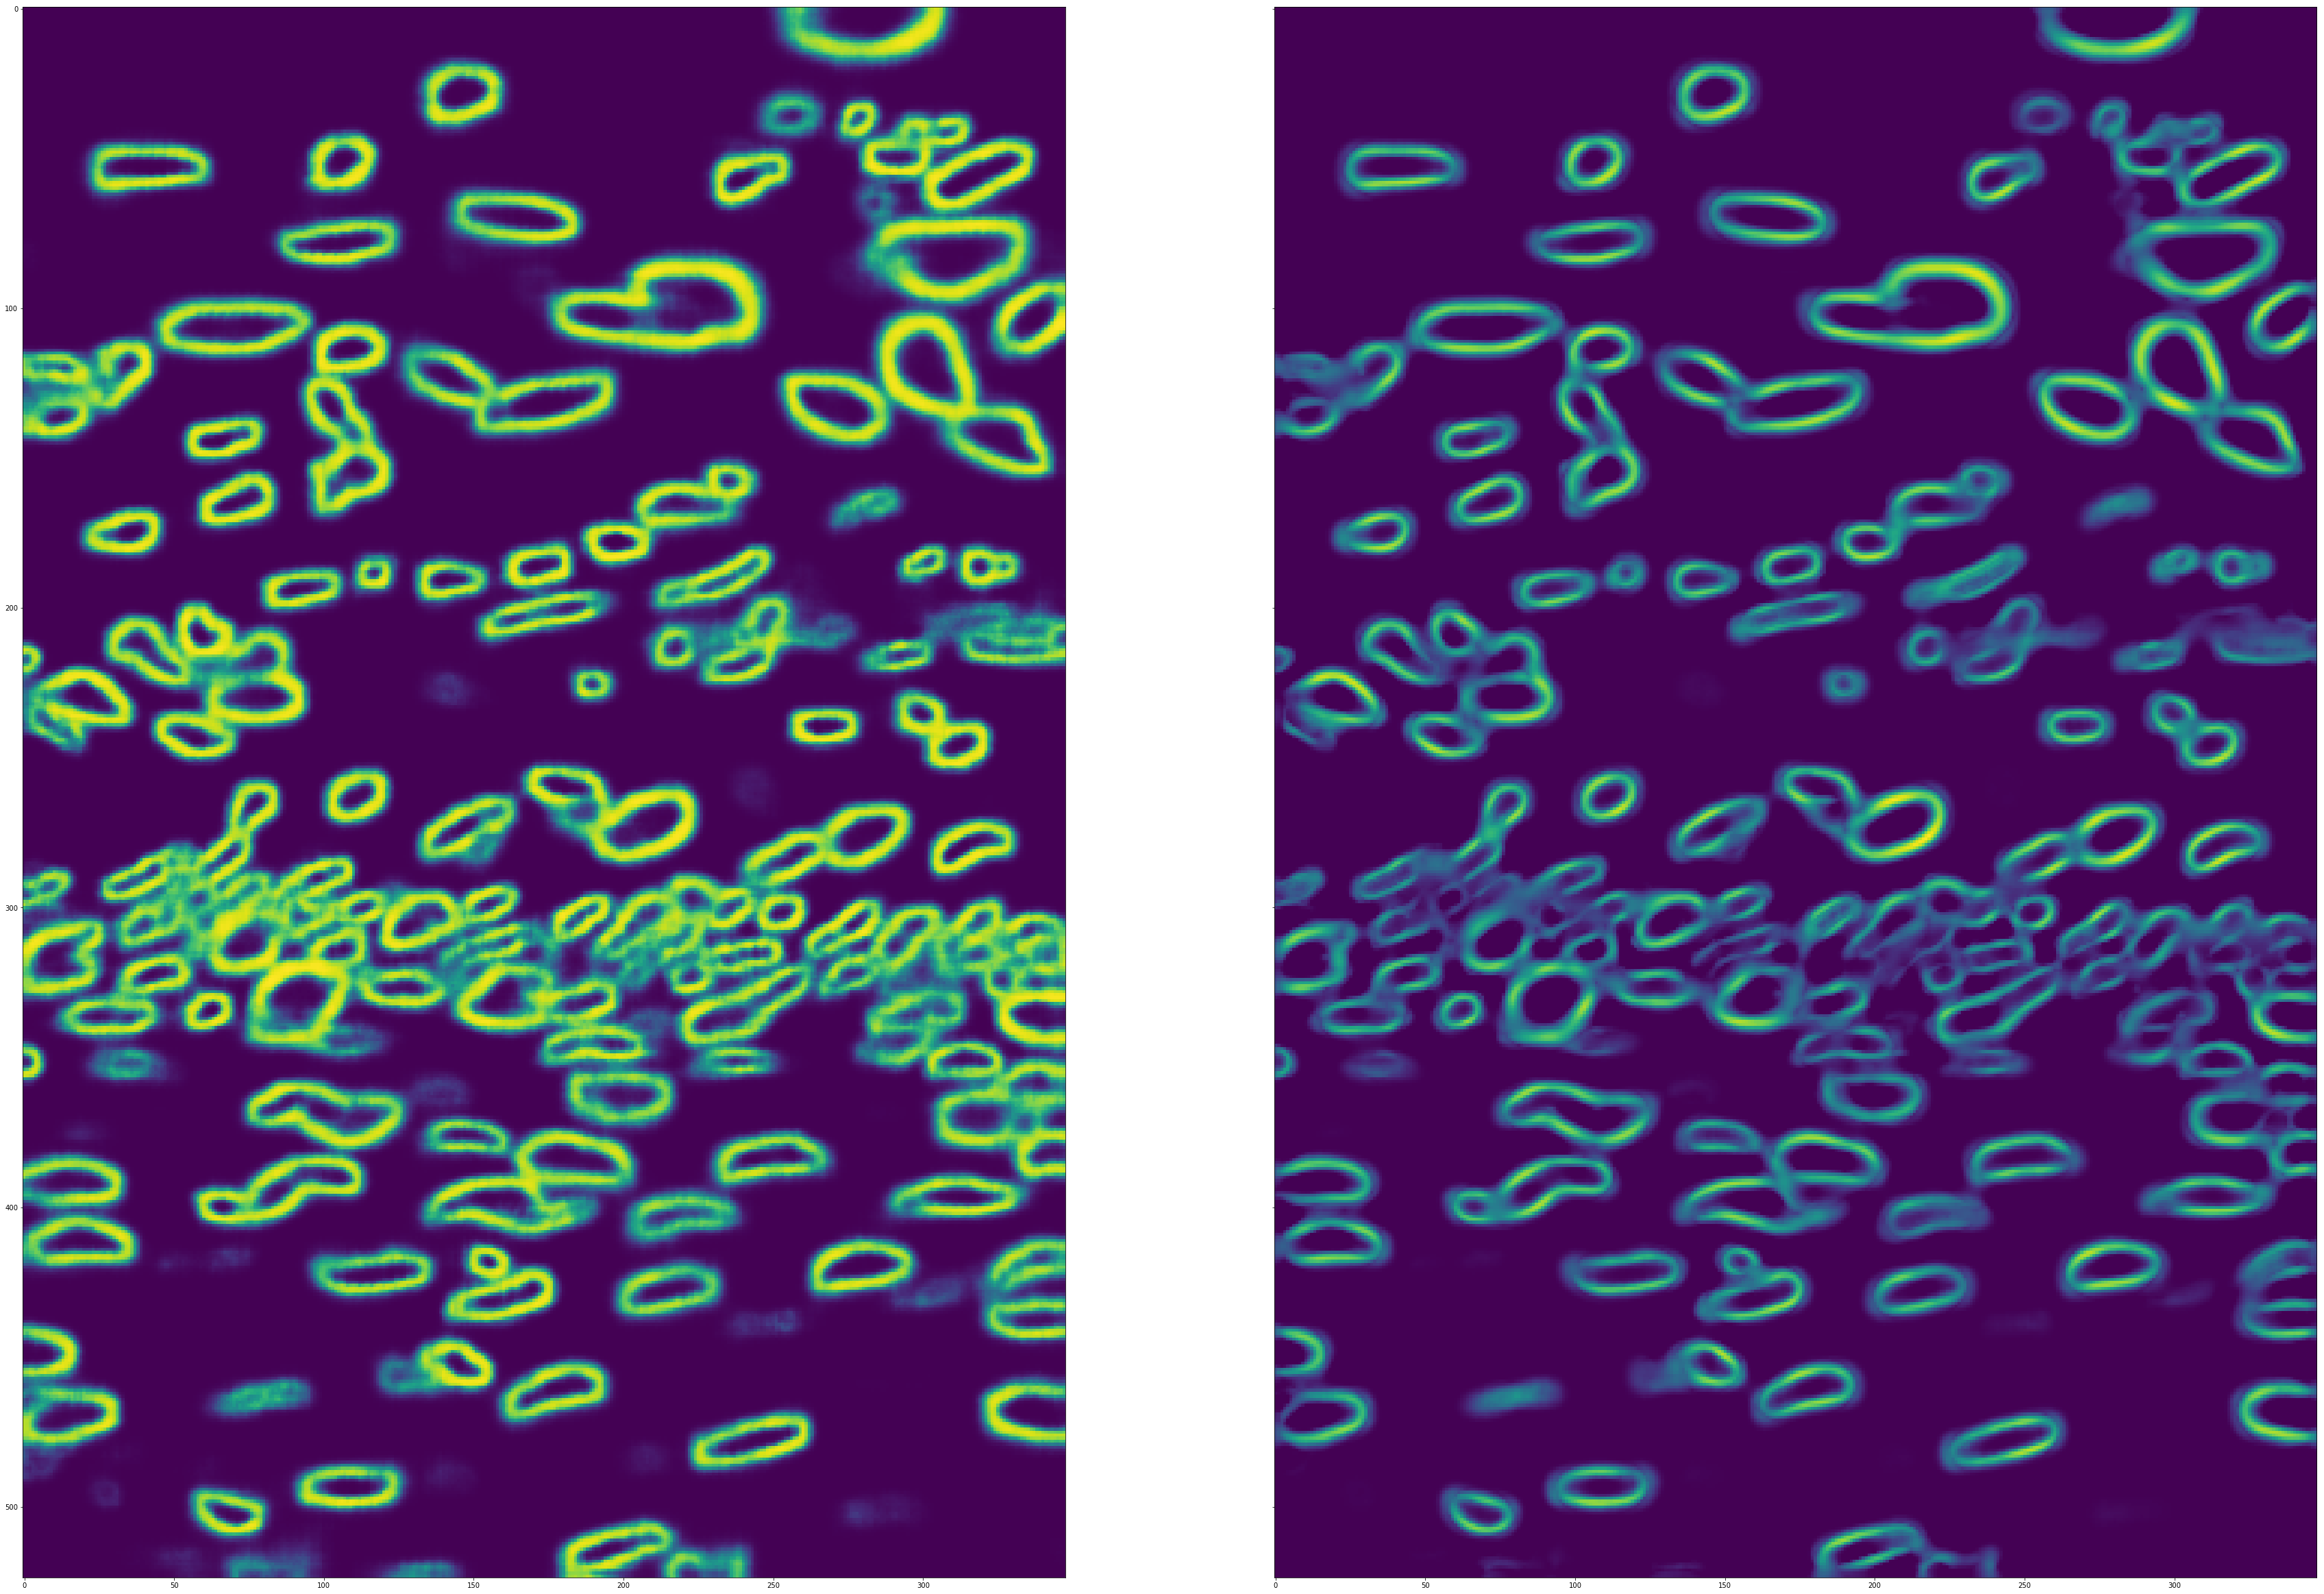

In [3]:
result_con = np.load('/tmp/nuclei/res2.npy')
trans_con = np.load('/tmp/nuclei/con2.npy')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(60, 60), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(result_con)
ax[1].imshow(trans_con)

/home/jfaath/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


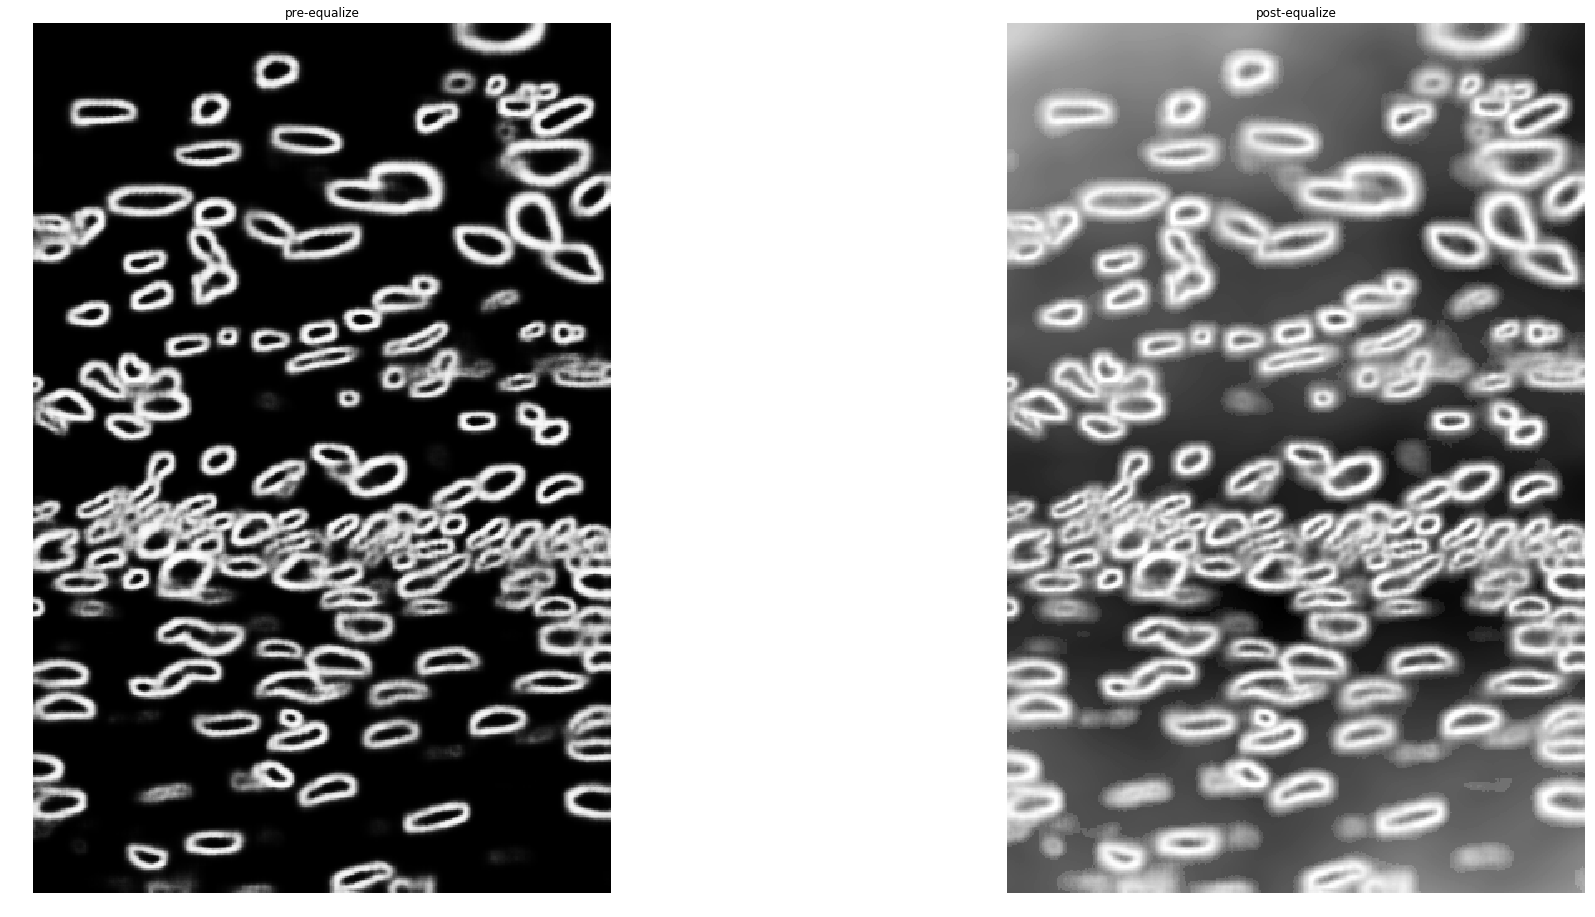

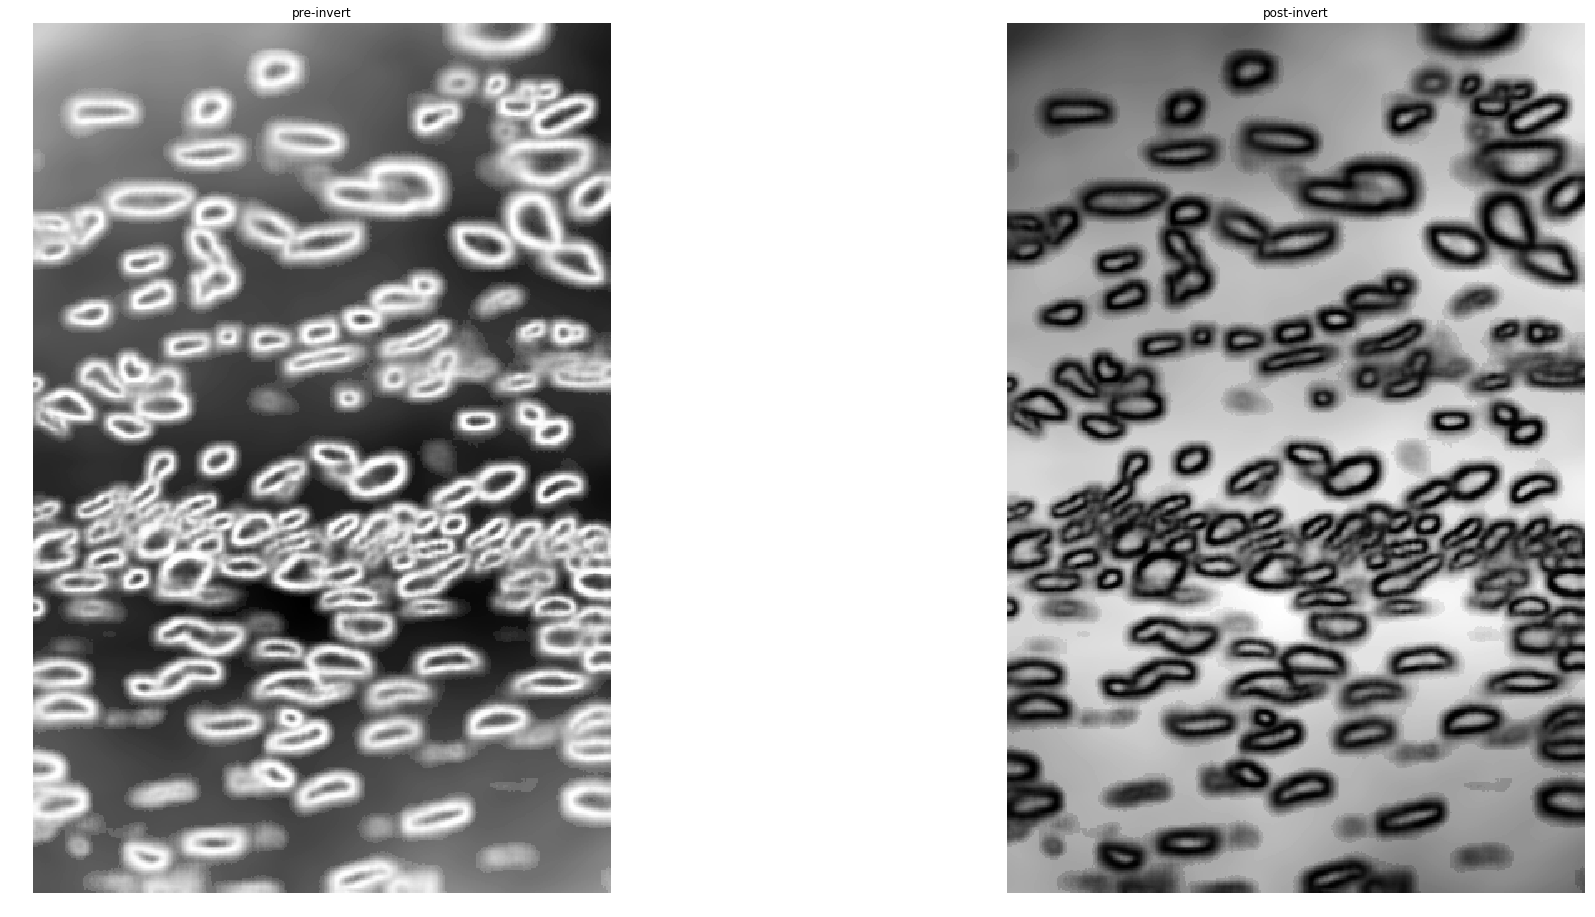

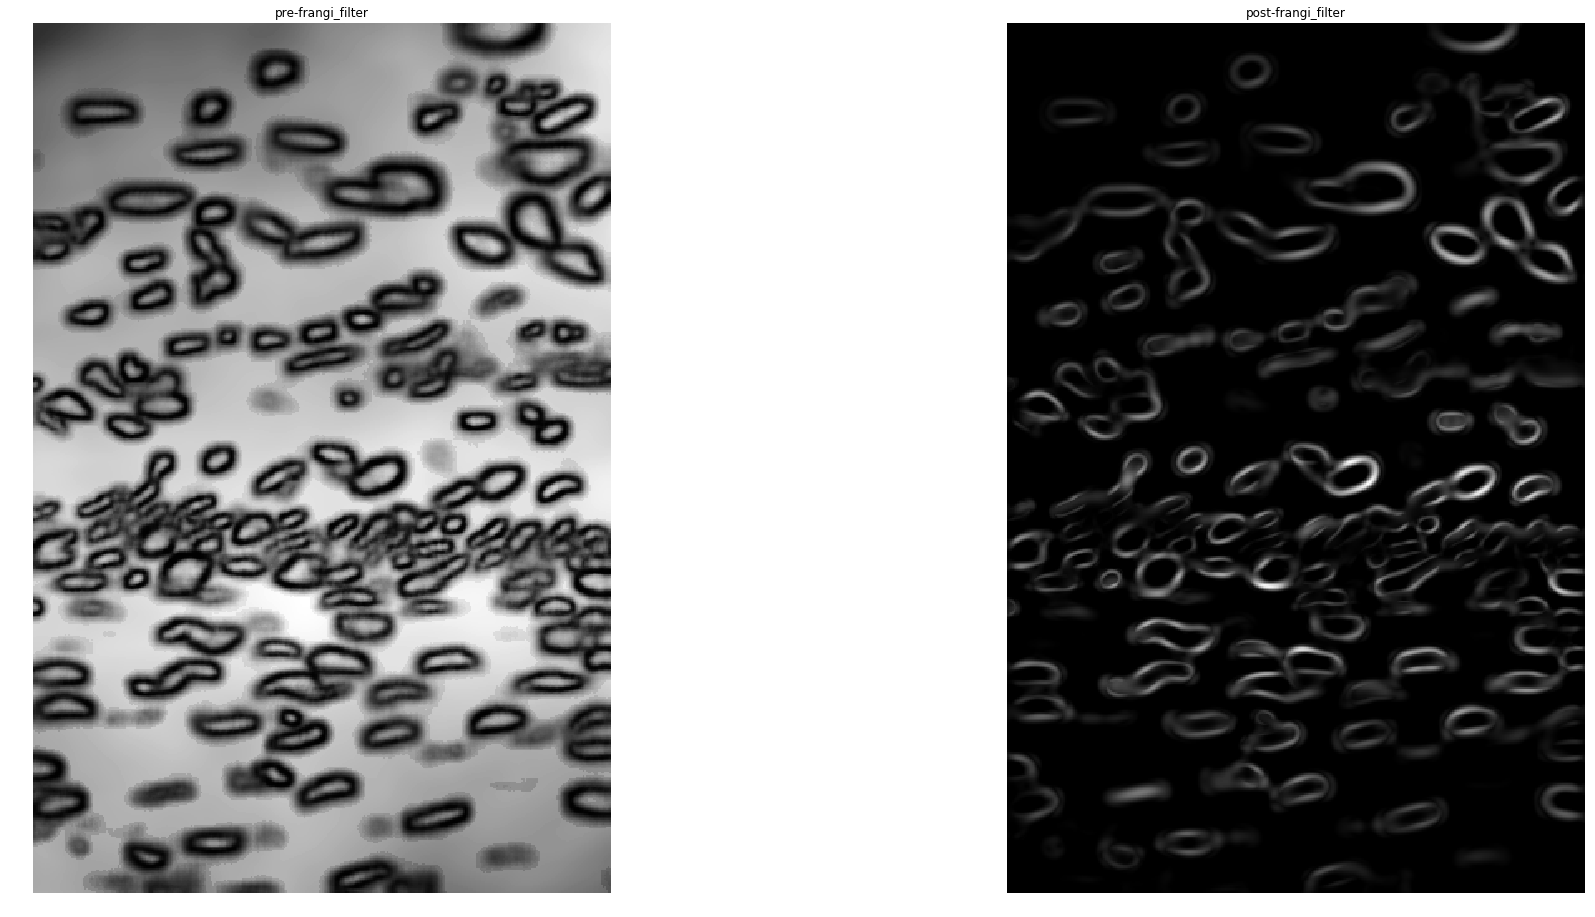

In [99]:
def scale(img):
    return img / np.max(img)

mm = sklearn.preprocessing.MinMaxScaler()

transforms_con = OrderedDict()
#transforms_con[skimage.filters.rank.median] = {'selem': s}
#transforms_con[skimage.filters.laplace] = {}
#transforms_con[mm.fit_transform] = {}
#transforms_con[eval.invert] = {}
#transforms_con[eval.frangi_filter] = {}
#transforms_con[scale] = {}
#transforms_con[skimage.filters.rank.mean_percentile] = {'selem': s, 'p0': 0.1, 'p1': 0.5}
#transforms_con[skimage.exposure.equalize_hist] = {}
#transforms_con[skimage.filters.rank.equalize] = {'selem': s}

s = skimage.morphology.disk(100)
#transforms_con[skimage.filters.rank.mean_bilateral] = {'selem': s, 's0': 0, 's1': 64}
transforms_con[eval.invert] = {}
transforms_con[eval.frangi_filter] = {}
t_con = eval.run_transforms(result_con, transforms_con)
# s = skimage.morphology.disk(10)
# transforms_con[skimage.filters.rank.mean_bilateral] = {'selem': s, 's0': 0, 's1': 64}
# transforms_con[eval.invert] = {}
# transforms_con[scale] = {}
# t_con = eval.run_transforms(t_con, transforms_con)


t_con dtype: float64
t_con max: 0.0001563235439179836
t_con min: 0.0


/home/jfaath/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:314: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


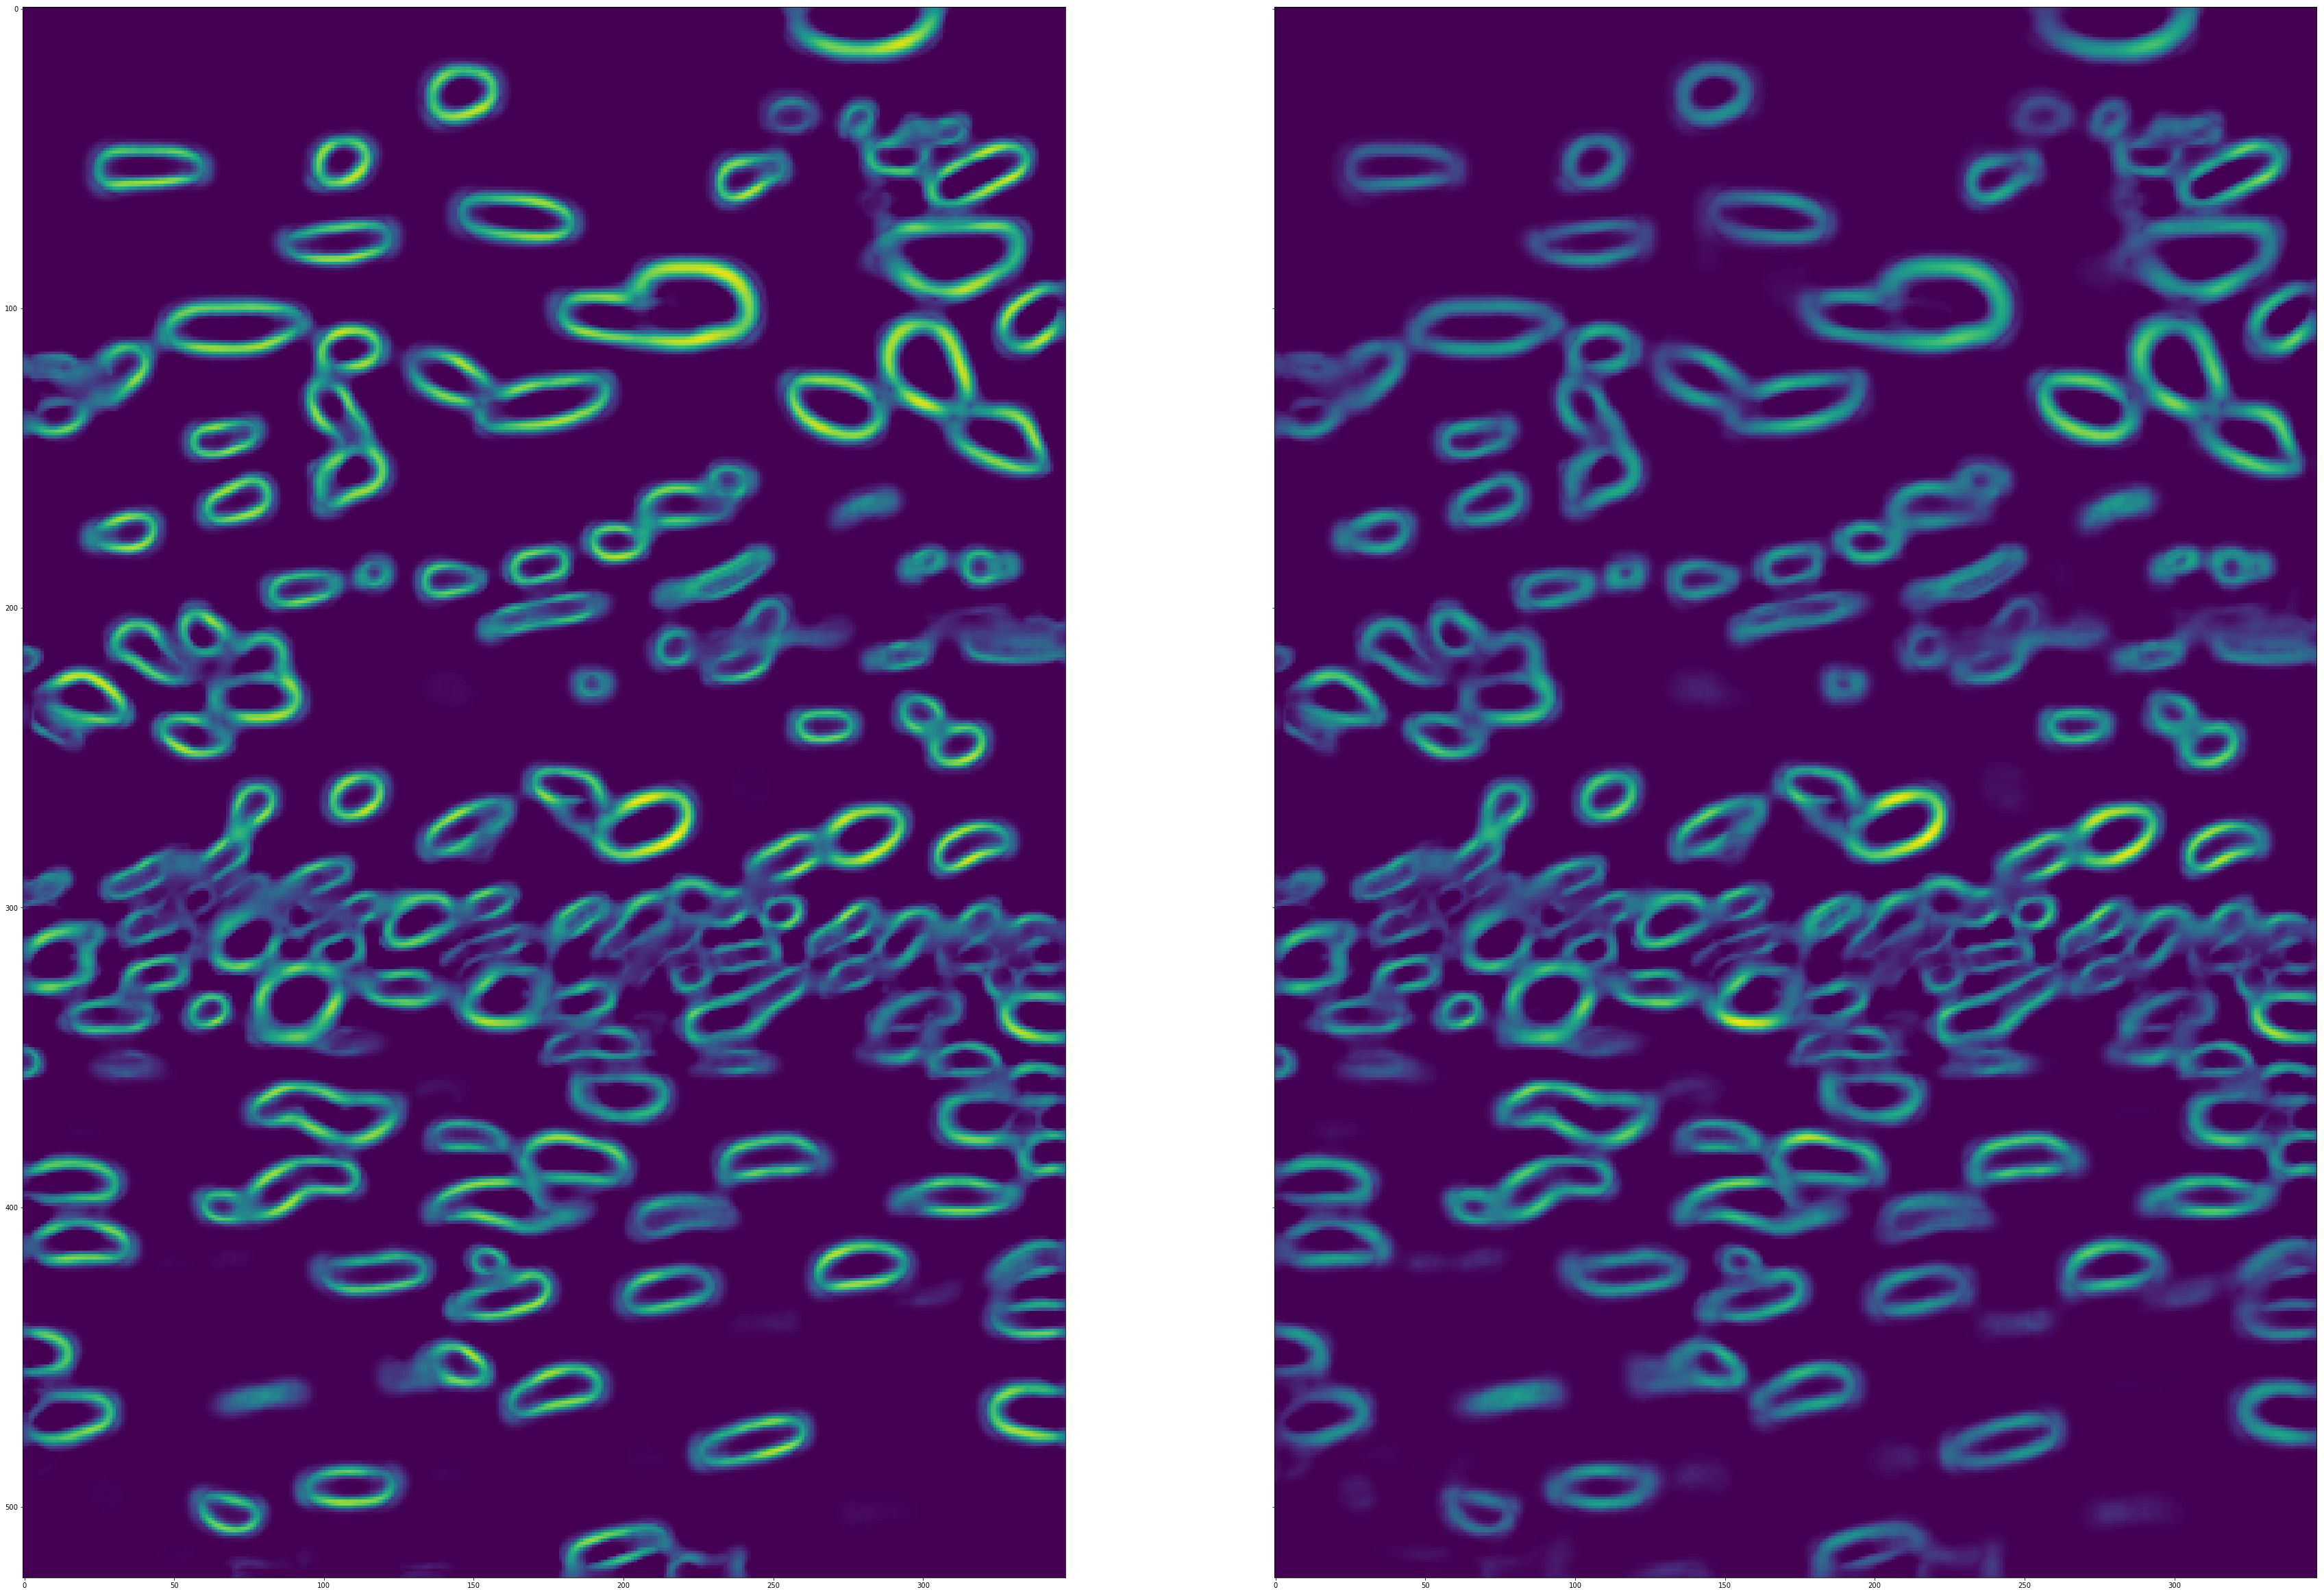

In [100]:
#t_con = t_con / 255.
print(f"t_con dtype: {t_con.dtype}")
print(f"t_con max: {np.max(t_con)}")
print(f"t_con min: {np.min(t_con)}")
trans_con_new = scipy.stats.gmean(np.dstack((result_con, t_con)), axis=2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(60, 60), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(trans_con)
ax[1].imshow(trans_con_new)